In [16]:
import pandas as pd
import numpy as np

In [4]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
data.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [5]:
a_swap = {
    'no': 0,
    'yes': 1
}

data.sold = data.sold.map(a_swap)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [11]:
from datetime import datetime
current_year = 2018
datetime.today().year

2023

In [12]:
data['age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age
0,0,21801,2000,30941.02,1,18
1,1,7843,1998,40557.96,1,20
2,2,7109,2006,89627.50,0,12
3,3,26823,2015,95276.14,0,3
4,4,7935,2014,117384.68,1,4


In [13]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age,km_per_year
0,0,21801,2000,30941.02,1,18,35085.22134
1,1,7843,1998,40557.96,1,20,12622.05362
2,2,7109,2006,89627.50,0,12,11440.79806
3,3,26823,2015,95276.14,0,3,43167.32682
4,4,7935,2014,117384.68,1,4,12770.11290


In [14]:
data = data.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


## Data

In [15]:
x = data[['price', 'age', 'km_per_year']]
y = data[['sold']]

## LinearSVC

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)
print(f'Treinaremos com {len(train_x)} elementos e testaremos com {len(test_x)} elementos.')

model = LinearSVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'A acurácia foi de {accuracy:.2%}')

Treinaremos com 7500 elementos e testaremos com 2500 elementos.


/home/adriel/alura/ml_classification_sklearn/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adriel/alura/ml_classification_sklearn/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


A acurácia foi de 50.68%


/home/adriel/alura/ml_classification_sklearn/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Dummy Classifier

In [41]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(train_x, train_y)
prediction = dummy.predict(test_x)

accuracy = accuracy_score(test_y, prediction)
print(f'A acurácia foi de {accuracy:.2%}')

A acurácia foi de 59.16%


## SVC

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
prediction = model.predict(test_x)

accuracy = accuracy_score(prediction, test_y)
print(f'A acurácia foi de {accuracy:.2%}.')

/home/adriel/alura/ml_classification_sklearn/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 77.48%.


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier(max_depth=2)
model.fit(raw_train_x, train_y)
prediction = model.predict(raw_test_x)

accuracy = accuracy_score(prediction, test_y)
print(f'A acurácia foi de {accuracy:.2%}.')

A acurácia foi de 76.84%.


In [ ]:
## !pip install graphviz

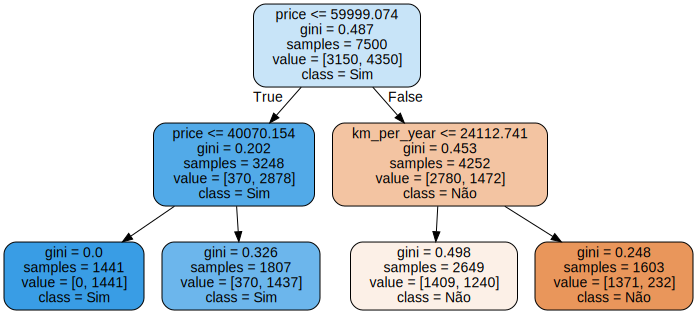

In [65]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(model, out_file=None,
                           filled=True, rounded=True,
                           class_names=['Não', 'Sim'],
                           feature_names=features)
graph = graphviz.Source(dot_data)
graph